In [72]:
from imutils import paths
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image
import os
import pickle

In [73]:
imagePaths = sorted(list(paths.list_images(r'C:\Users\DucTRung\Documents\Machine_Learning\Deep_Learning\Keras\work_space\self_driving\dataset')))
print(imagePaths)

['C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left0.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left1.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left10.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left100.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left101.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left102.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left103.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\

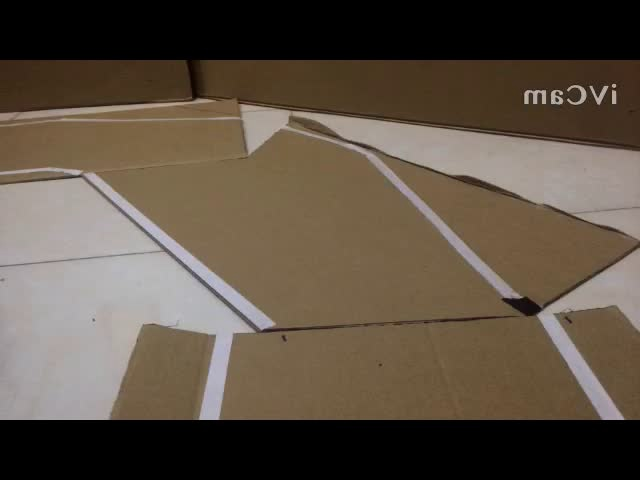

In [74]:
Image(filename=imagePaths[0])

In [75]:
def preprocessing_image(image):
    width = image.shape[1]
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    crop = blur[100:400, 0:width]
    equalize = cv2.equalizeHist(crop)
    normalize = equalize/255
    return normalize

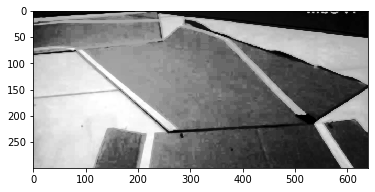

In [76]:
# Preprocessing image before training
image = cv2.imread(imagePaths[0])
processed_image = preprocessing_image(image)
plt.imshow(processed_image, cmap='gray')

In [77]:
# randomly shuffle data paths:
random.seed(42)
random.shuffle(imagePaths)
print(imagePaths)

['C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\straight\\straight371.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left456.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\left\\left446.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\right\\right142.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\right\\right186.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\straight\\straight20.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\work_space\\self_driving\\dataset\\straight\\straight427.jpg', 'C:\\Users\\DucTRung\\Documents\\Machine_Learning\\Deep_Learning\\Keras\\wor

In [78]:
print('image path:', imagePaths[0])
label = imagePaths[0].split(os.path.sep)[-2]
print('label:',label)

image path: C:\Users\DucTRung\Documents\Machine_Learning\Deep_Learning\Keras\work_space\self_driving\dataset\straight\straight371.jpg
label: straight


In [79]:
train_set = []
labels = []
for id, imagePath in enumerate(imagePaths):
    try:
        # Train_set
        image = cv2.imread(imagePath)
        processed_image = preprocessing_image(image)
        resized_image = cv2.resize(processed_image, (28, 28))
        image = np.asarray(resized_image)
        train_set.append(image)

        # Labels:
        label = imagePath.split(os.path.sep)[-2] # extract the class label from the image path
        if label == 'straight':
            label = 0
        elif label == 'left':
            label = 1
        elif label == 'right':
            label = 2
        labels.append(label)     
        
        print('preparing train_set ', id)
    except Exception as e:
        print(str(e))
        pass

print('train set:', train_set)
print('labels:', labels)

preparing train_set  0
preparing train_set  1
preparing train_set  2
preparing train_set  3
preparing train_set  4
preparing train_set  5
preparing train_set  6
preparing train_set  7
preparing train_set  8
preparing train_set  9
preparing train_set  10
preparing train_set  11
preparing train_set  12
preparing train_set  13
preparing train_set  14
preparing train_set  15
preparing train_set  16
preparing train_set  17
preparing train_set  18
preparing train_set  19
preparing train_set  20
preparing train_set  21
preparing train_set  22
preparing train_set  23
preparing train_set  24
preparing train_set  25
preparing train_set  26
preparing train_set  27
preparing train_set  28
preparing train_set  29
preparing train_set  30
preparing train_set  31
preparing train_set  32
preparing train_set  33
preparing train_set  34
preparing train_set  35
preparing train_set  36
preparing train_set  37
preparing train_set  38
preparing train_set  39
preparing train_set  40
preparing train_set  41
pr

preparing train_set  333
preparing train_set  334
preparing train_set  335
preparing train_set  336
preparing train_set  337
preparing train_set  338
preparing train_set  339
preparing train_set  340
preparing train_set  341
preparing train_set  342
preparing train_set  343
preparing train_set  344
preparing train_set  345
preparing train_set  346
preparing train_set  347
preparing train_set  348
preparing train_set  349
preparing train_set  350
preparing train_set  351
preparing train_set  352
preparing train_set  353
preparing train_set  354
preparing train_set  355
preparing train_set  356
preparing train_set  357
preparing train_set  358
preparing train_set  359
preparing train_set  360
preparing train_set  361
preparing train_set  362
preparing train_set  363
preparing train_set  364
preparing train_set  365
preparing train_set  366
preparing train_set  367
preparing train_set  368
preparing train_set  369
preparing train_set  370
preparing train_set  371
preparing train_set  372


preparing train_set  665
preparing train_set  666
preparing train_set  667
preparing train_set  668
preparing train_set  669
preparing train_set  670
preparing train_set  671
preparing train_set  672
preparing train_set  673
preparing train_set  674
preparing train_set  675
preparing train_set  676
preparing train_set  677
preparing train_set  678
preparing train_set  679
preparing train_set  680
preparing train_set  681
preparing train_set  682
preparing train_set  683
preparing train_set  684
preparing train_set  685
preparing train_set  686
preparing train_set  687
preparing train_set  688
preparing train_set  689
preparing train_set  690
preparing train_set  691
preparing train_set  692
preparing train_set  693
preparing train_set  694
preparing train_set  695
preparing train_set  696
preparing train_set  697
preparing train_set  698
preparing train_set  699
preparing train_set  700
preparing train_set  701
preparing train_set  702
preparing train_set  703
preparing train_set  704


preparing train_set  996
preparing train_set  997
preparing train_set  998
preparing train_set  999
preparing train_set  1000
preparing train_set  1001
preparing train_set  1002
preparing train_set  1003
preparing train_set  1004
preparing train_set  1005
preparing train_set  1006
preparing train_set  1007
preparing train_set  1008
preparing train_set  1009
preparing train_set  1010
preparing train_set  1011
preparing train_set  1012
preparing train_set  1013
preparing train_set  1014
preparing train_set  1015
preparing train_set  1016
preparing train_set  1017
preparing train_set  1018
preparing train_set  1019
preparing train_set  1020
preparing train_set  1021
preparing train_set  1022
preparing train_set  1023
preparing train_set  1024
preparing train_set  1025
preparing train_set  1026
preparing train_set  1027
preparing train_set  1028
preparing train_set  1029
preparing train_set  1030
preparing train_set  1031
preparing train_set  1032
preparing train_set  1033
preparing train_

preparing train_set  1312
preparing train_set  1313
preparing train_set  1314
preparing train_set  1315
preparing train_set  1316
preparing train_set  1317
preparing train_set  1318
preparing train_set  1319
preparing train_set  1320
preparing train_set  1321
preparing train_set  1322
preparing train_set  1323
preparing train_set  1324
preparing train_set  1325
preparing train_set  1326
preparing train_set  1327
preparing train_set  1328
preparing train_set  1329
preparing train_set  1330
preparing train_set  1331
preparing train_set  1332
preparing train_set  1333
preparing train_set  1334
preparing train_set  1335
preparing train_set  1336
preparing train_set  1337
preparing train_set  1338
preparing train_set  1339
preparing train_set  1340
preparing train_set  1341
preparing train_set  1342
preparing train_set  1343
preparing train_set  1344
preparing train_set  1345
preparing train_set  1346
preparing train_set  1347
preparing train_set  1348
preparing train_set  1349
preparing tr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



shape of samples: (1500, 28, 28)
shape of labels: (1500,)
path: C:\Users\DucTRung\Documents\Machine_Learning\Deep_Learning\Keras\work_space\self_driving\dataset\straight\straight181.jpg
label: 0
data:


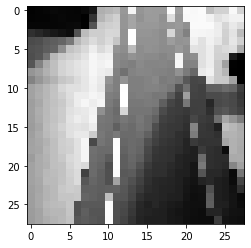

In [80]:
# cheching results
print('shape of samples:', np.asarray(train_set).shape)
print('shape of labels:', np.asarray(labels).shape)
print('path:', imagePaths[1000])
print('label:', labels[1000])
print('data:')
plt.imshow(train_set[1000], cmap= 'gray')
plt.show()

In [81]:
# Serialization
with open('train_set_driveless.pickle', 'wb') as f:
    pickle.dump(train_set, f)
with open('labels_driveless.pickle', 'wb') as f:
    pickle.dump(labels, f)    